# Importing the Data and libraries needed

In [34]:
#point 2 - analyze run times in relation to revenue

In [1]:
#Importing libraries that will be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3

In [2]:
#Importing movie budgets and previewing data
df_gross = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
df_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#looking for missing data, rows and column information
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
con = sqlite3.connect('../../zippedData/im.db')

runtime = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)
runtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
runtime = pd.read_sql("""
SELECT runtime_minutes
FROM movie_basics
WHERE runtime_minutes is not null AND runtime_minutes < 300
""", con)
run = runtime.astype(int)
run

,runtime_minutes
0,175
1,114
2,122
3,80
4,75
...,...
114268,51
114269,84
114270,90
114271,123


In [13]:
run.describe()

,runtime_minutes
count,114273.000000
mean,84.737663
std,28.152987
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,296.000000


<AxesSubplot:title={'center':'runtime minutes'}>

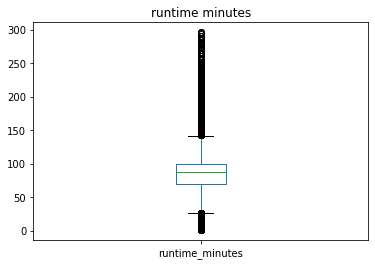

In [14]:
run.plot(kind='box', title='runtime minutes')